## Dataset avvistamenti UFO

**Attenzione**: Nelle date (campo 'datetime') è presente anche come ora 24:xx che però causa problemi con 
        tutto quello che parsa le date. Ho fatto 'sostituisci tutto' 24 -> 00 ma non è proprio corretto
        perchè bisogna anche aumentare il giorno  
**Attenzione**: Il file 'sample.csv' è il dataset 'scrubbed.csv' ma con solo 1 riga ogni 10, è meglio per testare visto che il dataset originale sono circa 80000 righe e ci mette molto per calcolare alcune cose

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
DATASET = 'out.csv'
data = pd.read_csv(DATASET)

In [14]:
# Questo è leeeento
datetimes = pd.to_datetime(data['datetime'])

In [15]:
counts = datetimes.dt.hour.value_counts()

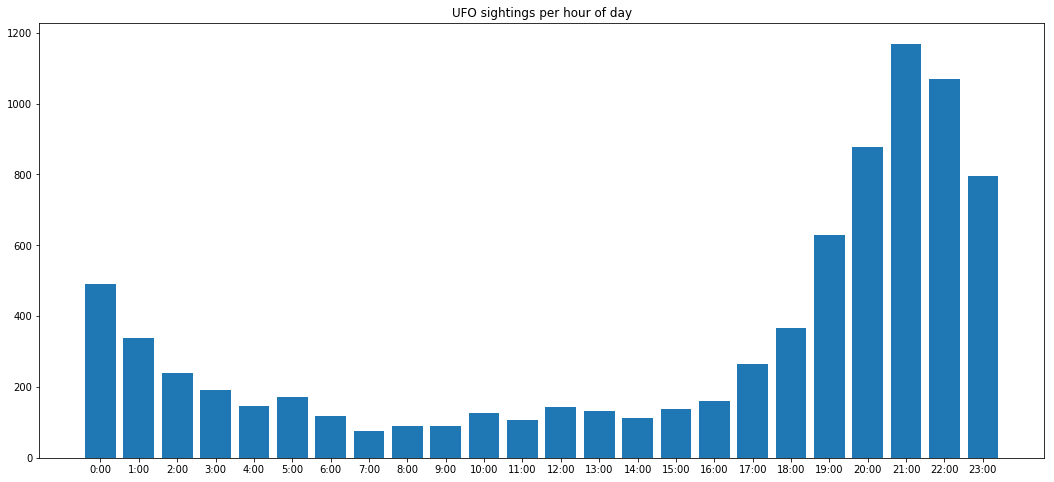

In [16]:
# Grafico degli avvistamenti per ora del giorno (senza colori)

plt.figure(figsize=(18, 8))
plt.title('UFO sightings per hour of day')
bars = plt.bar(counts.index, counts.get_values())
labels = [f'{h}:00' for h in range(0, 24)]
plt.xticks(range(len(labels)), labels)

plt.show()

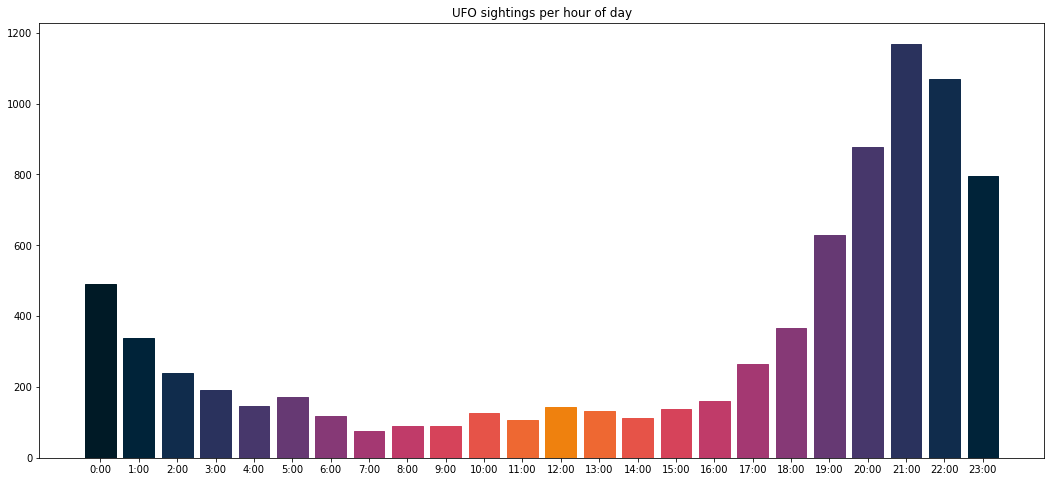

In [17]:
# Grafico degli avvistamenti per ora del giorno (con colori)
gradients = [
    (0, 26, 38), (0, 35, 57), (16, 44, 76), (42, 50, 93), 
    (71, 55, 107), (102, 57, 115), (134, 57, 118), (164, 56, 114), 
    (192, 59, 105), (214, 67, 90), (230, 83, 72), (238, 104, 50), 
    (239, 129, 14)
]
gradients = [(r/255, g/255, b/255, 1.0) for (r, g, b) in gradients]
gradients = gradients + list(reversed(gradients[:-1]))

# dalle 0:00 alle 23:00
g2 = [
    (0, 26, 38), 
    (0, 26, 38), 
    (7, 29, 37), 
    (32, 40, 35), 
    (82, 61, 30),
    (109, 73, 27), 
    (146, 89, 23), 
    (159, 95, 22), 
    (171, 100, 21), 
    (184, 105, 20), 
    (196, 110, 18), 
    (209, 116, 17), 
    (237, 128, 14)
    (209, 116, 17),
    (196, 110, 18), 
    (184, 105, 20), 
    (171, 100, 21), 
    (159, 95, 22), 
    (146, 89, 23), 
    (109, 73, 27), 
    (82, 61, 30),
    (32, 40, 35), 
    (7, 29, 37), 
    (0, 26, 38)
]
gradients = [(r/255, g/255, b/255, 1.0) for (r, g, b) in gradients]

plt.figure(figsize=(18, 8))
plt.title('UFO sightings per hour of day')
bars = plt.bar(counts.index, counts.get_values())
labels = [f'{h}:00' for h in range(0, 24)]
plt.xticks(range(len(labels)), labels)

for bar_i, index in enumerate(counts.index):
    bars[bar_i].set_color(gradients[index])
plt.show()

(15218,             datetime                  city state country   shape  \
 1   10/10/1949 21:00          lackland afb    tx     NaN   light   
 2   10/10/1955 17:00  chester (uk/england)   NaN      gb  circle   
 6   10/10/1965 21:00    penarth (uk/wales)   NaN      gb  circle   
 18  10/10/1973 23:00           bermuda nas   NaN     NaN   light   
 20  10/10/1974 21:30    cardiff (uk/wales)   NaN      gb    disk   
 
     duration (seconds) duration (hours/min)  \
 1               7200.0              1-2 hrs   
 2                 20.0           20 seconds   
 6                180.0         about 3 mins   
 18                20.0              20 sec.   
 20              1200.0           20 minutes   
 
                                              comments date posted   latitude  \
 1   1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005  29.384210   
 2   Green/Orange circular disc over Chester&#44 En...   1/21/2008  53.200000   
 6   penarth uk  circle  3mins  stayed 30ft 

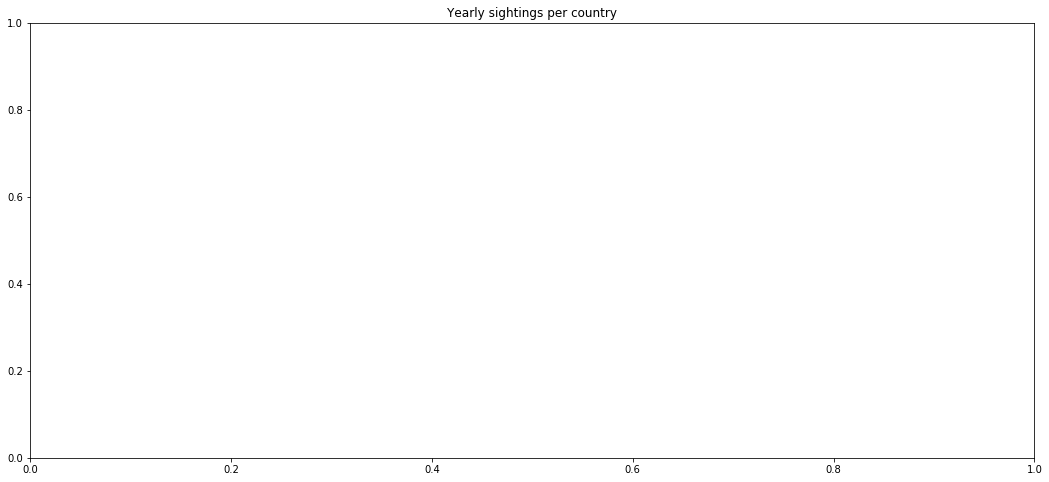

In [14]:
plt.figure(figsize=(18, 8))
plt.title('Yearly sightings per country')
not_us = data[data['country'] != 'us']
len(not_us), not_us[:5]

In [36]:
#pd.merge(data[data['state'].isnull()], , how="inner")

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
